# Assignment 3: Word Embedding, RNN, Token Classification

With your environment activated int the terminal, run:
```
mamba env create -n cs5293-3 python=3.10
pip install -r requirements.txt
##Your VSCode may complain sometime you need to install ipykernel using the following commands. If not, then  just ignore this. 
#mamba install -n cs5293-3 ipykernel  --force-reinstall 
```

In this assignment, you have to submit two things:
* (1) The whole folder with your code (not with .cache or your model checkpoints)
* (2) A report to summarize what your experienments in part 2 and part 3 

# Part 1: Word Embedding (Total: 50)

## Section 1.1 History: Symbolic vs. Neural vs. Neuro-Symbolic (0' Please just read it)
In the lecture 11-12, we introduced two ways to represent language: (1) Symbolic Representation (2) Neural Representation. The symbolic representation is based on various linguistic theories in language understanding Pyramid from Morphology, Syntax, Semantics, to Pragmatics.

Historically, symbolic NLP dominated the early decades of the field, beginning in the 1950s and 1960s with rule-based machine translation systems such as the Georgetown-IBM experiment, and heavily influenced by Chomsky’s formal grammars. During the 1970s and 1980s, symbolic approaches flourished through hand-crafted grammars, logic-based formalisms, and knowledge representation systems such as semantic networks, frames, and ontologies. Pioneering systems like SHRDLU demonstrated how symbolic representations could connect language with reasoning in restricted domains, while projects such as WordNet, FrameNet, PropBank, and the Penn Treebank provided structured lexical knowledge resources, each addressing different layers of linguistic representation, respectively. 

### From WordNet to ImageNet
WordNet (Miller, 1995) offered a large-scale lexical database organized around synonym sets and semantic relations such as hypernymy and meronymy, making it foundational for lexical semantics and ontology construction. FrameNet (Fillmore et al., 1997) encoded knowledge about semantic frames and the roles that words evoke, supporting work in semantic role labeling and event understanding. PropBank (Kingsbury & Palmer, 2002) extended this by providing predicate-argument structures annotated on text, giving a bridge between syntax and semantics for machine learning approaches. Finally, the Penn Treebank (Marcus et al., 1993) provided richly annotated syntactic parses, enabling the development and benchmarking of parsers and statistical models. Together, these resources represented a major milestone in symbolic NLP, offering explicit, interpretable linguistic knowledge that underpinned decades of research in parsing, semantic role labeling, and knowledge-driven applications.  WordNet not only served as a cornerstone for lexical semantics in symbolic NLP, but also laid the groundwork for resources beyond language. Notably, it became the foundation for ImageNet (Deng et al., 2009), where WordNet’s synset hierarchy was used to define over 20,000 object categories and organize millions of labeled images. ImageNet, in turn, became the catalyst for modern deep learning: the 2012 ImageNet Large Scale Visual Recognition Challenge (ILSVRC) was famously won by AlexNet, marking the breakthrough moment that triggered the deep learning revolution. In this way, we can trace a direct historical lineage from symbolic lexical resources like WordNet to the emergence of neural representation learning — illustrating that even today’s most successful neural methods are deeply indebted to the symbolic traditions that preceded them.

### From SHRDLU to ChatGPT: "Wow Moment" in NLP
Terry Winograd’s pioneering work on SHRDLU in the 1970s demonstrated how natural language could be grounded in reasoning and action within a well-defined world. Although the system was limited to the “blocks world,” its integration of syntax, semantics, and logic-based inference set a template for how language understanding could be tied to structured reasoning. This vision continues to influence modern research: today’s large language models may rely on statistical learning rather than handcrafted rules, but many of their most exciting applications — from tool use to step-by-step reasoning and planning — still deeply echo the principles Winograd introduced. In this sense, his symbolic framework still resonates as a conceptual foundation for the reasoning capabilities we now seek to realize at scale with LLMs. It integrated syntax, semantics, and reasoning in one system, demonstrating the potential of symbolic approaches to make language explainable and grounded. Just as SHRDLU was a landmark moment for symbolic NLP, ChatGPT represents the modern ‘SHRDLU moment’ for neural NLP — a vivid public demonstration of conversational competence. The next SHRDLU moment, however, may lie in systems that move beyond surface-level fluency toward grounded, explainable, and trustworthy reasoning — perhaps through hybrid neuro-symbolic approaches that finally reconcile efficiency with interpretability. Let's see!

By the 1980s and 1990s, symbolic methods matured into large-scale parsers, grammar formalisms (e.g., LFG, HPSG, CCG), discourse models, and expert systems, aiming to capture meaning with precise rules. 
However, they also revealed limitations: brittleness in handling ambiguity, domain transfer, and the high cost of manual rule engineering. These challenges eventually opened the door for statistical and neural methods, though symbolic representation remains foundational in areas like formal semantics, knowledge graphs, and explainable AI. Modern NLP often revisits symbolic traditions in hybrid systems, combining the interpretability of structured knowledge with the adaptability of neural models.

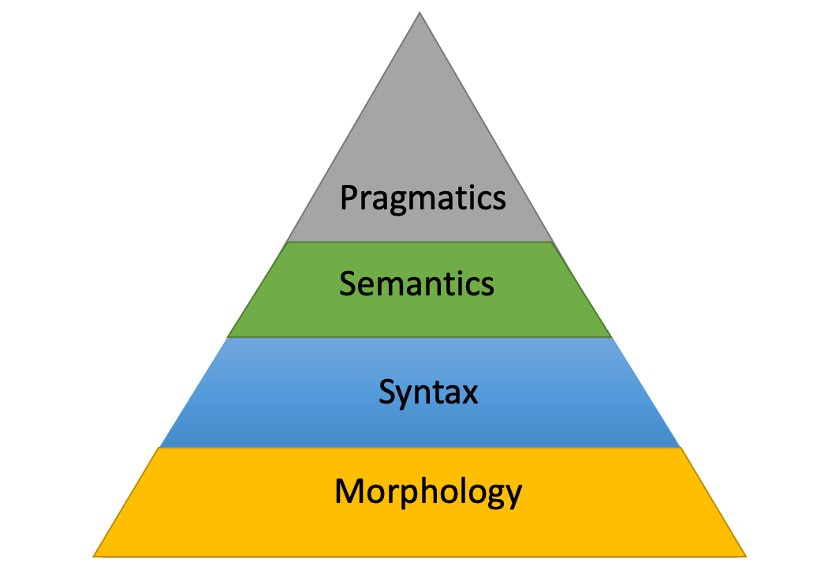


### Distributional Hypothesis and Word Embedding

What does ongchoi mean? You will guess the meaning when you see the context of its usage: 
* Ong choi is delicious sautéed with garlic. 
* Ong choi is superb over rice
* Ong choi leaves with salty sauces

Because you already seen the following so you conclude that Ongchoi is leafy green like spinach, chard, or collard greens
* …spinach sautéed with garlic over rice
* Chard stems and leaves are delicious
* Collard greens and other salty leafy greens

We learned two kinds of vector representation: Sparse(TF-IDF) and Dense(Skipgram and CBOW). 
In this assignment, we will learn how to train word embedding with NGram, SkipGram, then please implement your own Continuous Bag-of-Words(CBOW) via pytorch and related libaries.

## Section 1.2. Train WordEmbedding via Neural Ngram Language Model(50')
Before we go in depth, let us do a few quick notes
about how to use embeddings in Pytorch and a further practice of Pytorch programming
in general. Similar to how we defined a unique index for each word when
making one-hot vectors in the Sparse vector representatio(Word-Term, Word-Word matrix), we also need to define an index for each word
when using embeddings. These will be keys into a lookup table. That is,
embeddings are stored as a $|V| \times D$ matrix, where $D$ is the
dimensionality of the embeddings, such that the word assigned index $i$
has its embedding stored in the $i$\'th row of the matrix. In all of my
code, the mapping from words to indices is a dictionary named
word\_to\_ix.

The module that allows you to use embeddings is torch.nn.Embedding,
which takes two arguments: the vocabulary size, and the dimensionality
of the embeddings.

To index into this table, you must use torch.LongTensor (since the
indices are integers, not floats).

In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# set a seed
torch.manual_seed(1)

# Let us assume a simple key-value dictionary to map each words into an index.
word_to_ix = {"hello": 0, "world": 1}
# Then we define a simple embedding layer in Pytorch
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings
# We look up the embedding layer via the word indices.
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
print(hello_embed)
# Print the shape and type of the lookup tensor and the embedding
print(lookup_tensor.shape, lookup_tensor.dtype)
print(hello_embed.shape, hello_embed.dtype)

tensor([[ 0.6614,  0.2669,  0.0617,  0.6213, -0.4519]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([1]) torch.int64
torch.Size([1, 5]) torch.float32


In [2]:
# Let use the glove embedding in the data folder and load it via pytorch
import numpy as np
embeddings_index = {}
with open("../data/glove.6B.50d-subset.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('Found %s word vectors.' % len(embeddings_index))

Found 14921 word vectors.


In [3]:
# Using a linux command to check how many lines in the glove.6B.50d-subset.txt
# It matches the number of word vectors we just loaded.
!wc -l ../data/glove.6B.50d-subset.txt

   14921 ../data/glove.6B.50d-subset.txt


### Another Pytorch Tutorial: Neural Network N-Gram Language Modeling (30')

Recall that in an n-gram language model, given a sequence of words $w$,
we want to compute

$$P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1} )$$

Where $w_i$ is the ith word of the sequence.

In this example, different from SkipGram, we will use the previous n words to predict the next words as the self-supervised learning. 
In the following example, we still use the Markov Assumption, ngram model, to train our word embeddings. 

Actually, this left-to-right autogressive way of next word prediction is also the way ChatGPT get pretrained nowadays except that OpenAI have different instruction data and more reward/preference data for the post-training part. Furthermore, they have much longer context

Based on next word prediction Ngram model, we will compute the loss function on some training examples and update the parameters with backpropagation.


In [4]:
# Different the count-based N-gram in assignment1, here we will build a
# neural network based N-gram model. The input to the model is the
# concatenation of the embeddings of the context words, and the output
# is the log-probabilities of the words in the vocabulary.
# We will use a simple feed-forward neural network with one hidden layer.
# The hidden layer has 128 units and uses the ReLU activation function.
# The output layer uses the log-softmax function to produce log-probabilities.
# The loss function is the negative log-likelihood loss given the log-probabilities
# and the target word.

class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        # the last layer to predict the log-probability of each word in the vocabulary
        # You could image this layer as a classifier over the vocabulary, which is |V|-wasy classifier.
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs



In [5]:
# For bigram, the context size is 1
# For trigram, the context size is 2, let us use the trigram for this example.
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()

# we should tokenize the input, but we will ignore that for now
# build a list of tuples.
# Each tuple is ([ word_i-CONTEXT_SIZE, ..., word_i-1 ], target word)
# please padding the context with <s> if there is no enough context
# for example, the first tuple would be (["<s>", "<s>"], "When")
# the second tuple would be (["<s>", "When"], "forty")
# and so on.
# Note that we are using the previous CONTEXT_SIZE words to predict the next word.


In [6]:
# A function to extract the ngrams from the test_sentence
def extract_ngrams(context_size, test_sentence):
    # always pad the context with <s>
    # for example, the first tuple would be (["<s>", "<s>"], "When")
    # the second tuple would be (["<s>", "When"], "forty")
    # and so on.
    # Note that we are using the previous CONTEXT_SIZE words to predict the next word.
    # please padding the context with <s> if there is no enough context
    # preappend <s> * context_size to the test_sentence
    padded_sentence = ["<s>"] * context_size + test_sentence
    ngrams = [
        (padded_sentence[i - context_size:i], padded_sentence[i])
        for i in range(context_size, len(padded_sentence))
    ]
    return ngrams

ngrams = extract_ngrams(CONTEXT_SIZE, test_sentence)
# Print the first 3, just so you can see what they look like.
print(ngrams[:3])

vocab = set(test_sentence)
vocab.add("<s>")
vocab = list(vocab)
# print the vocab size
print("Vocab size:", len(vocab))
# build up the word to index dictionary for all the words in the vocab, including <s>
word_to_ix = {word: i for i, word in enumerate(vocab)}

[(['<s>', '<s>'], 'When'), (['<s>', 'When'], 'forty'), (['When', 'forty'], 'winters')]
Vocab size: 98


In [7]:
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

# use print to visualize the model we just built
print(model)
# Notice that we didn't put the relu into the model definition, because it has no parameters.
# We will move the relu into the model definition later

NGramLanguageModeler(
  (embeddings): Embedding(98, 10)
  (linear1): Linear(in_features=20, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=98, bias=True)
)


In [27]:
# Analyze the number of trainable parameters in the model
trainable_params = sum(
	p.numel() for p in model.parameters() if p.requires_grad
)

print(trainable_params)
assert trainable_params == (len(vocab) * EMBEDDING_DIM) + (CONTEXT_SIZE * EMBEDDING_DIM * 128) + 128 + (128 * len(vocab)) + len(vocab)

385355


#### Training the NNLM(5')

In [11]:
# Finish the training code below
# We will train the model using the ngrams we just extracted
# The training code is similar to the one we used in the Assignment 2
def train_model(model, ngrams, word_to_ix, loss_function, optimizer, epochs=10):
    losses = []
    for epoch in range(epochs):
        total_loss = 0
        # Step through the training data one context-target pair at a time
        # We will change this to mini-batch later
        # shuffle the ngrams for each epoch
        import random
        random.shuffle(ngrams)
        for context, target in ngrams:
            # !! Fix the code below !!
            # Step 1. Prepare the inputs to be passed to the model (i.e., turn the words
            # into integer indices and wrap them in tensors)
            # Hint: Use word_to_ix to map words to indices
            context_idxs = [word_to_ix[w] for w in context]
            target_idx = word_to_ix[target]
            # Finish the following line
            # Step 2. Recall that torch *accumulates* gradients. Before passing in a
            # new instance, you need to zero out the gradients from the old
            # instance
            optimizer.zero_grad()
            context_tensor = torch.tensor(context_idxs, dtype=torch.long)
            target_tensor = torch.tensor([target_idx], dtype=torch.long)
            # Step 3. Run the forward pass, getting log probabilities over next words
            log_probs = model(context_tensor)
            # Step 4. Compute your loss function. (Again, Torch wants the target
            # word wrapped in a tensor)
            loss = loss_function(log_probs, target_tensor)
            # Step 5. Do the backward pass and update the gradient
            # Hint: caculate the loss, call loss.backward(), and then call optimizer.step()
            loss.backward()
            optimizer.step()
            # Get the Python number from a 1-element Tensor by calling tensor.item()
            total_loss += loss.item()
        losses.append(total_loss)
        print(f"Epoch {epoch + 1}, Loss: {total_loss}")
    return losses

# Train the model using the train_model function
losses = train_model(model, ngrams, word_to_ix, loss_function, optimizer)

# To get the embedding of a particular word, e.g., "beauty"
print(model.embeddings.weight[word_to_ix["beauty"]])

Epoch 1, Loss: 525.8715076446533
Epoch 2, Loss: 523.370274066925
Epoch 3, Loss: 520.8853225708008
Epoch 4, Loss: 518.4166378974915
Epoch 5, Loss: 515.963339805603
Epoch 6, Loss: 513.5233128070831
Epoch 7, Loss: 511.0958275794983
Epoch 8, Loss: 508.6792848110199
Epoch 9, Loss: 506.2722725868225
Epoch 10, Loss: 503.87573432922363
tensor([ 1.3009, -0.6289, -0.0693,  0.6943, -0.2894,  0.1512, -0.2991, -0.1297,
         1.5375,  0.9191], grad_fn=<SelectBackward0>)


Let use the training file in assignment 1 to rebuild this Neural Ngram model.

In [12]:
# Reading the lines from training file in assignment 1
with open("../data/training.txt", "r") as f:
    lines = f.readlines()
# Just print the first 3 lines to see how it looks like
print(lines[:3])

["In college football action , the University of Donald Trump's Fighting Donald Trumps wins the national championship in the Donald Trump Bowl by purchasing a last-second field goal for a reported $ 23 million . \n", 'The savings and loan industry announces heavy fourth-quarter bingo losses . \n', 'President Bush is sworn in and declares a War on Trout . \n']


In [13]:
# Generate ngrams from the training file
# We will simply split the lines into words via whitespace
# and use a context size of 2 to build the trigrams.
# Let us assume a simple key-value dictionary to map each words into an index.
# Let us ignore case of the words, the starting and ending tokens for each line for now.
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10

ngrams = [] # list of tuples
vocab = set()
# Just split the lines into words via whitespace
# and use a context size of 2 to build the trigrams.
# Let us ignore case of the words, still padding with <s>.
# generate the ngrams for each line and add them to the ngrams list
# add the words to the vocab set
for line in lines:
    words = line.lower().strip().split()
    vocab.update(words)
    ngrams.extend(extract_ngrams(CONTEXT_SIZE, words))

# Print the first 3, just so you can see what they look like.
print(ngrams[:3])
# Print the vocabulary size, which should be larger than the sonnet example.
print("Vocabulary size:", len(vocab))
# It should be same as the number in your assignment 1. It is 2752 because we use the same training file.
# However, here we also add the <s> token to the vocab, because this <s> token also has a trainable embedding.
vocab.add("<s>")
vocab = list(vocab)
print("add <s>, vocabulary size:", len(vocab))

[(['<s>', '<s>'], 'in'), (['<s>', 'in'], 'college'), (['in', 'college'], 'football')]
Vocabulary size: 2752
add <s>, vocabulary size: 2753


In [14]:
# Let use the above ngrames and vocab to train a neural ngram LM
word_to_ix = {word: i for i, word in enumerate(vocab)}

# Enter your code here to train the model
# You can use the same training loop as above
losses = []
# Let use the above ngrames and vocab to train a neural ngram LM
# Since the output is a log-probability over the vocabulary, we can use
# the negative log likelihood loss.
# If you are not familiar with it, you can read about it here:
# https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
# analyze the number of trainable parameters in the model
trainable_params = sum(
	p.numel() for p in model.parameters() if p.requires_grad
)
print(trainable_params)
assert trainable_params == (len(vocab) * EMBEDDING_DIM) + (CONTEXT_SIZE * EMBEDDING_DIM * 128) + 128 + (128 * len(vocab)) + len(vocab)

optimizer = optim.SGD(model.parameters(), lr=0.001)

# call the train_model function to train the model
# Note that this will take a while, since we are not using mini-batch
# So please use a smaller number of epochs, e.g., < 10
losses = train_model(model, ngrams, word_to_ix, loss_function, optimizer, epochs=10)
# You should see the loss decreasing over epochs. This is a good sign.
# You can plot the loss over epochs if you like.
# You can use matplotlib to plot the loss.
# import matplotlib.pyplot as plt
# plt.plot(losses)
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()
# However, the loss is not very meaningful since we do not have a
# held-out validation set. We will ignore that for now.

385355
Epoch 1, Loss: 83558.9421185255
Epoch 2, Loss: 76330.00425708294
Epoch 3, Loss: 73618.41957342625
Epoch 4, Loss: 72110.80289721489
Epoch 5, Loss: 71081.50876891613
Epoch 6, Loss: 70295.92829072475
Epoch 7, Loss: 69634.85490322113
Epoch 8, Loss: 69053.30780541897
Epoch 9, Loss: 68519.6286200285
Epoch 10, Loss: 68019.64773821831


#### Batch Training with Batch NLLM Model(5')

In [18]:
# To stable the training, you can try to tune the learning rate and write a mini-batch version of the training loop.
# You can use the torch.utils.data.DataLoader to create mini-batches.
# You can read about it here:
# https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader
# Implement a mini-batch version of the training loop here with the DataLoader.

def train_model_mini_batch(model, ngrams, word_to_ix, loss_function, optimizer, epochs=10, batch_size=32):
    from torch.utils.data import DataLoader, TensorDataset

    # Prepare the dataset
    contexts = []
    targets = []
    for context, target in ngrams:
        context_idxs = [word_to_ix[w] for w in context]
        target_idx = word_to_ix[target]
        contexts.append(context_idxs)
        targets.append(target_idx)

    # Convert to tensors
    contexts_tensor = torch.tensor(contexts, dtype=torch.long)
    targets_tensor = torch.tensor(targets, dtype=torch.long)

    # Create DataLoader for mini-batch training
    dataset = TensorDataset(contexts_tensor, targets_tensor)
    # shuffle and batch the data at each epoch
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    losses = []
    for epoch in range(epochs):
        total_loss = 0
        # Step through the training data one batch at a time
        # We will use mini-batch training
        # Each batch contains batch_size context-target pairs
        # We will use the DataLoader to create mini-batches
        for context_batch, target_batch in dataloader:
            ## !! Fix the code below !!
            optimizer.zero_grad()
            log_probs = model(context_batch)
            loss = loss_function(log_probs, target_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        losses.append(total_loss)
        print(f"Epoch {epoch + 1}, Loss: {total_loss}")
    return losses

In [19]:
# write a mini-batch version of the NGramLanguageModeler forward function
class NGramLanguageModelerBatch(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModelerBatch, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)
        # instead of call F.relu in the forward function, we can use nn.ReLU in the constructor and put it into a nn.Sequential
        self.relu = nn.ReLU()
        # instead of call F.log_softmax in the forward function, we can use nn.LogSoftmax in the constructor and put it into a nn.Sequential
        # Note that we need to specify the dimension to apply log_softmax
        # nn.Flatten is used to flatten the input tensor, see more details here:
        # https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html
        self.model = nn.Sequential(
            self.embeddings,
            nn.Flatten(),
            self.linear1,
            self.relu,
            self.linear2,
            nn.LogSoftmax(dim=1)
        )

    def forward(self, inputs):
        # inputs is of shape (batch_size, context_size)
        # each row is a context
        # we can pass the inputs directly to the self.model
        # because the self.model contains all the layers we need
        log_probs = self.model(inputs)
        return log_probs

In [20]:
# let use the mini-batch model to train the model
batch_model = NGramLanguageModelerBatch(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
batch_optimizer = optim.SGD(batch_model.parameters(), lr=0.01)

# let us print the new model
print(batch_model)
# analyze the number of trainable parameters in the new model
trainable_params = sum(
    p.numel() for p in batch_model.parameters() if p.requires_grad
)
print(trainable_params)
assert trainable_params == (len(vocab) * EMBEDDING_DIM) + (CONTEXT_SIZE * EMBEDDING_DIM * 128) + 128 + (128 * len(vocab)) + len(vocab)
# call the train_model_mini_batch function to train the model, this should be much faster than the previous one
losses = train_model_mini_batch(batch_model, ngrams, word_to_ix, loss_function, batch_optimizer, epochs=10, batch_size=32)
# You should see the loss decreasing over epochs. This is a good sign.
# You can plot the loss over epochs if you like.

NGramLanguageModelerBatch(
  (embeddings): Embedding(2753, 10)
  (linear1): Linear(in_features=20, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=2753, bias=True)
  (relu): ReLU()
  (model): Sequential(
    (0): Embedding(2753, 10)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=20, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2753, bias=True)
    (5): LogSoftmax(dim=1)
  )
)
385355
Epoch 1, Loss: 2760.3039932250977
Epoch 2, Loss: 2634.208804130554
Epoch 3, Loss: 2519.3513164520264
Epoch 4, Loss: 2446.484270095825
Epoch 5, Loss: 2398.211813926697
Epoch 6, Loss: 2361.980938911438
Epoch 7, Loss: 2332.273838996887
Epoch 8, Loss: 2307.594515800476
Epoch 9, Loss: 2290.5953454971313
Epoch 10, Loss: 2273.725051879883


In [21]:

# To get the embedding of a particular word, e.g. "good", "nice", and "bad"
good_embedding = batch_model.embeddings.weight[word_to_ix["good"]]
nice_embedding = batch_model.embeddings.weight[word_to_ix["nice"]]
bad_embedding = batch_model.embeddings.weight[word_to_ix["bad"]]
print(f"""
      good:{good_embedding}
      nice:{nice_embedding}
      bad:{bad_embedding}
    """
      )


      good:tensor([-0.1038, -1.6306,  1.2916,  0.6565, -0.5886, -0.9817,  0.0465,  0.6765,
         0.0829,  0.4262], grad_fn=<SelectBackward0>)
      nice:tensor([-1.7619,  0.6791, -0.8561,  1.0270,  0.3578, -0.1685, -1.3243, -0.8351,
         1.2460, -1.0553], grad_fn=<SelectBackward0>)
      bad:tensor([ 1.6047,  0.3733, -0.5451,  1.2561, -1.4682, -1.0815, -1.2800,  0.7112,
        -0.1925, -0.3703], grad_fn=<SelectBackward0>)
    


#### Evaluate the Word Embedding (5')

In [23]:
# Let measure the distance between these embeddings via cosine similarity, euclidean distance, and manhattan distance
# write the code to compute these distances
def compute_all_distances(emb1, emb2):
	cos = F.cosine_similarity(emb1.unsqueeze(0), emb2.unsqueeze(0)).item()
	euclidean_distance = torch.dist(emb1, emb2, p=2).item()
	manhattan_distance = torch.dist(emb1, emb2, p=1).item()
	return cos, euclidean_distance, manhattan_distance

# test three words that are synonyms or antonyms
def test_distances(model):
    word_pairs = [("good", "nice"), ("good", "bad"), ("nice", "bad")]
    for w1, w2 in word_pairs:
        emb1 = model.embeddings.weight[word_to_ix[w1]]
        emb2 = model.embeddings.weight[word_to_ix[w2]]
        cos, euclidean_distance, manhattan_distance = compute_all_distances(emb1, emb2)
        print(f"Distances between '{w1}' and '{w2}': Cosine: {cos}, Euclidean: {euclidean_distance}, Manhattan: {manhattan_distance}")

test_distances(batch_model)

# You will find that the trained embedding may not very good when using 2 and 50, please try to use a larger context size and embedding dimension to improve it in Task 1.1.3

Distances between 'good' and 'nice': Cosine: -0.2807936668395996, Euclidean: 4.701253890991211, Manhattan: 13.772335052490234
Distances between 'good' and 'bad': Cosine: 0.18308570981025696, Euclidean: 3.731238603591919, Manhattan: 9.561213493347168
Distances between 'nice' and 'bad': Cosine: 0.008831620216369629, Euclidean: 4.547056198120117, Manhattan: 10.665542602539062


In [24]:
# save the model with torch.save
torch.save(batch_model.state_dict(), "ngram_model.pth")

# However, the state_dict only contains the parameters of the model, not the words_to_ix dictionary or idx_to_word dictionary.
# You need to save them separately if you want to use the model later.
import pickle
with open("word_to_ix.pkl", "wb") as f:
    pickle.dump(word_to_ix, f)
with open("vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

# However, the saved model only contains the parameters of the model, not the model structure.
# To load the model, you need to create a new instance of the model class

# load the model with torch.load
# you need to create a new model instance first
loaded_model = NGramLanguageModelerBatch(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
loaded_model.load_state_dict(torch.load("ngram_model.pth"))
loaded_model.eval()  # set the model to evaluation mode
# Now you can use the loaded_model to do inference or further training

NGramLanguageModelerBatch(
  (embeddings): Embedding(2753, 10)
  (linear1): Linear(in_features=20, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=2753, bias=True)
  (relu): ReLU()
  (model): Sequential(
    (0): Embedding(2753, 10)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=20, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2753, bias=True)
    (5): LogSoftmax(dim=1)
  )
)

#### Caculate N-gram Probability with NN Model (10')

Instead of using the count-based Ngram, let use the probability of 3-gram model from the NN we just trained. 

In [ ]:
# Function to calculate the log-probability of a sentence using the trained neural n-gram model
def sentence_log_probability(model, sentence, word_to_ix, context_size=2):
    """
    Calculate the total log-probability of a sentence by summing log-probabilities
    of each word given its context.

    Args:
        model: Trained NGramLanguageModelerBatch neural network
        sentence: Input sentence as a string
        word_to_ix: Dictionary mapping words to their integer indices
        context_size: Number of previous words to use as context (default=2 for trigram)

    Returns:
        log_prob: Total log-probability of the sentence (float)
    """
    # Convert sentence to lowercase and split into words
    words = sentence.lower().strip().split()
    # Pad the beginning with <s> tokens to handle the first few words
    # e.g., for trigram: ["<s>", "<s>", "word1", "word2", ...]
    padded_sentence = ["<s>"] * context_size + words
    # Initialize cumulative log probability
    log_prob = 0.0

    # Iterate through each word position (starting after the padding)
    for i in range(context_size, len(padded_sentence)):
        # Extract the context: previous context_size words
        # e.g., for i=2, context_size=2: padded_sentence[0:2]
        context = padded_sentence[i - context_size:i]
        # The target word to predict at position i
        target = padded_sentence[i]
        # Convert context words to their indices (use <s> for unknown words)
        context_idxs = [word_to_ix.get(w, word_to_ix["<s>"]) for w in context]
        # Convert target word to its index (use <s> for unknown words)
        target_idx = word_to_ix.get(target, word_to_ix["<s>"])
        # Convert context indices to a tensor and add batch dimension
        # Shape changes from (context_size,) to (1, context_size) for batch processing
        context_tensor = torch.tensor([context_idxs], dtype=torch.long)
        # Get log-probabilities from the model for all vocabulary words
        # log_probs shape: (1, vocab_size)
        log_probs = model(context_tensor)
        # Extract the log-probability of the target word and accumulate
        # log_probs[0, target_idx] gets the probability at batch index 0, word index target_idx
        log_prob += log_probs[0, target_idx].item()

    # Return the total log-probability of the sentence
    return log_prob

# Read test sentences from the test file used in assignment 1
with open("../data/test.txt", "r") as f:
    test_lines = f.readlines()  # List of test sentences

# Load the vocabulary from the saved pickle file
vocab = pickle.load(open("vocab.pkl", "rb"))  # List of all vocabulary words
# Create reverse mapping from indices to words
ix_to_word = {i: w for i, w in enumerate(vocab)}
# Print and verify vocabulary size matches the model's embedding layer
print("Vocab size:", len(vocab))
assert len(vocab) == len(loaded_model.embeddings.weight)
# Load the word-to-index mapping from the saved pickle file
word_to_ix = pickle.load(open("word_to_ix.pkl", "rb"))  # Dictionary: word -> index
# Calculate and print log-probability for each test sentence
for line in test_lines:
    # Calculate log-probability for the current sentence
    log_prob = sentence_log_probability(loaded_model, line.strip(), word_to_ix)
    # Print the sentence and its log-probability
    print(f"Sentence: {line.strip()}\nLog-Probability: {log_prob}\n")

# Compare the log-probability of the sentences in the test file with the one you got in assignment 1.
# Of course it will be different, since we are using a different model.

Vocab size: 2753
Sentence: Wolf
Log-Probability: -8.603910446166992

Sentence: Widespread panic
Log-Probability: -17.472312927246094

Sentence: I don't trust horses .
Log-Probability: -28.55367159843445

Sentence: I swear I am not making this up .
Log-Probability: -51.78269004821777

Sentence: Never forget your froggy .
Log-Probability: -35.943697929382324

Sentence: Little did I know that a treacherous lizard addressed 300,000 scientists .
Log-Probability: -82.95192766189575



#### Generate a text with NNLM and Learned Word Embeddings (5')

In [32]:
# Finally, let use the own neural ngram language model to generate some text as the generator in assignment 1
# We will use the model to generate text given a starting context
# * your program generates one of three words: [. ? !]
# * your program generates 40 words (NOT including the original seed word)
# We will use the similar sampling method as in assignment 1
# However, instead of sampling from the count-based distribution, we will sample from the log-probability distribution
# We will use the torch.multinomial function to sample from the distribution
# You can read about it here: https://pytorch.org/docs/stable/generated/torch.multinomial.html
# Note that the input to torch.multinomial should be a probability distribution
# So we need to exponentiate the log-probabilities to get the probabilities
# We will also use the torch.topk function to get the top k words with highest probabilities
# You can read about it here: https://pytorch.org/docs/stable/generated/torch.topk.html
# This is to avoid sampling from the entire vocabulary, which may include many low-probability words
# We will set k = 10 by default
# You can adjust the k value to see how it affects the generation
# You can also adjust the max_len value to see how it affects the generation
# We will learn more parameters to control the generation in the next assignment
def generate_text(model, start_words, word_to_ix, ix_to_word, context_size=2, max_len=40, k=10):
    model.eval()  # set the model to evaluation mode
    words = start_words.lower().split()
    if len(words) < context_size:
        words = ["<s>"] * (context_size - len(words)) + words

    generated_words = words[:] # start with the initial context words
    for _ in range(max_len):
        context = generated_words[-context_size:]  # get the last context_size words
        context_idxs = [word_to_ix.get(w, word_to_ix["<s>"]) for w in context]
        context_tensor = torch.tensor([context_idxs], dtype=torch.long)
        log_probs = model(context_tensor)
        probs = torch.exp(log_probs).squeeze()  # convert log-probs to probs and remove batch dimension
        topk_probs, topk_indices = torch.topk(probs, k)  # get top k probabilities and their indices
        topk_probs = topk_probs / torch.sum(topk_probs)  # normalize to get a valid probability distribution
        next_word_idx = torch.multinomial(topk_probs, 1).item()  # sample one index from the top k
        next_word = ix_to_word[topk_indices[next_word_idx].item()]  # get the corresponding word
        generated_words.append(next_word)
        if next_word in {".", "?", "!"}:  # stop if we generate a sentence-ending punctuation
            break
    return ' '.join(generated_words[context_size:])  # return the generated words excluding the initial <s> tokens

# let us read the seed words from the seed file in assignment 1, and start the generation
with open("../data/seeds.txt", "r") as f:
    seed_lines = f.readlines()

# start the generation
ix_to_word = {i: w for w, i in word_to_ix.items()}
for line in seed_lines:
    generated_text = generate_text(loaded_model, line.strip(), word_to_ix, ix_to_word)
    print(f"Seed: {line.strip()}\nGenerated: {generated_text}\n")


Seed: I
Generated: to and , the , , and , a .

Seed: the
Generated: .

Seed: according
Generated: i to the the is a that .

Seed: animals
Generated: , to to of the that , the , , is the of , the on the to , and .

Seed: Zsa
Generated: a in , in the i , and , .



### Futher Exploration on WordEmbedding via OSCER (20')
You will find that the trained embedding is not very good. For example, sometimes the "good" is opposite with "nice"(negative cos similarity) but has positive cos similarity with "bad". 

** Important: Please write a pdf to report your improvement with the following improvement **

Please put the useful code into a seperate file called "nnlm.py" to run other experiments for improvement, such as "context = 5, dimension = 50", also adjust the learning rate etc, see how to improve this. 
* Please make it work the similar as the ngram.py in the assignment 1 Part2 to caculate the probability and generate the sentences. It will take traningfile, test_file and seed_file as input, and any other arguments, caculate the probability, and generate the text.
    * Input and Command:```python nnlm.py <training file> <test file> <seeds_file>```
    * Output: Two trace files: (1) ngram-prob.trace for the logprob outputs (2) ngram-gen.trace for the generated sentence for each seed.
* Please run this new program with sbatch in OSCER to test different hyperparameters.

# Part 2: Deep Neural Network with Word Embedding for Sentiment Classification (Total: 50)

In Assignment 2, you have worked on a 5-way deep average network on sentiment dataset (SST-5), which has 5 labels: very positive, positive, neutral, negative, very negative.  However, the performance is realtive low. 

In this part, based on the same SST-5 dataset, you have two tasks to test models beyond manually crafted features, let us move on the pretrained word embeddings. How well the word embedding based classifcation performed on sentiment classification. 


Important Hints:

* Note that there will be some out of vocabulary word.
* You will find a ton of existing code for this two tasks, it is ok to refer or reuse some of those code. 
* But some of those code are too old. You SHOULD use the lastest stable pytorch(2.8.0) for this.
* To run a batch job on OSCER, you need to reassemble the code from the notebook into regular source code to submit a slurm job (as we asked in this Part 1 NNLM)

What to turn in: You need to turn in the code and a pdf report to show the performance of your two new models on SST-5 dataset.
* Your hyperparameters, Model Architecture, the size of each layer, which word embedding
* Performance Metrics
Performance Metrics: 
* Classification Report in Sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Confusion Matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

## Section 2.1 Deep Averaging Networks(10')
 Improve the performance on SST-5(Assignment-2) with Word Embedding and Deep Averaging Networks as we mentioned in the class. Please implement a new pytorch model upon your Assignment-2' code base (But feel free to restart from scratch according to the tutorial in Part 1).


## Section 2.2 Pytorch LSTM (20')
Your goal: Add a new pytorch model(nn.module) using the 1-layer LSTM module for your SST-5 sentiment classifier in assignment 2.


Hint: There are tons of tutorial of using pytorch LSTM, even for this SST-5 dataset...
1. https://colab.research.google.com/gist/SauravMaheshkar/168f0817f0cd29dd4048868fb0dd4401/lstms-in-pytorch.ipynb#scrollTo=BKAA2rR0-B-3  This also introduce the code how to use wandb to track your experiments, which will be very useful for your project.


## Section 2.3 Using Gensim to Train a Word Embedding(20')

We have learned SkipGram in our class. With the above pytorch tutorial on NNLM(Part 1), it should be easy to implement the new Skipgram model.
However, let us save some time since we already do the neural Ngram Language Model. Furthermore, reimplementing an efficient Skipgram model on a large corpus takes a lot of time and optimization. 
There are a lot of optimized implementation and tons of papers since the original Word2Vec paper. 
 Hence, we will simply use exsiting library Gensim to train our word embedding. Please read the original Word2Vec paper to review the relationship between above NNLM, SkipGram, CBOW.
* https://arxiv.org/abs/1301.3781 
* https://github.com/piskvorky/gensim/blob/develop/gensim/models/word2vec.py 

The word2vec algorithms include skip-gram and CBOW models, using either
hierarchical softmax or negative sampling: `Tomas Mikolov et al: Efficient Estimation of Word Representations
in Vector Space <https://arxiv.org/pdf/1301.3781.pdf>`_, `Tomas Mikolov et al: Distributed Representations of Words
and Phrases and their Compositionality <https://arxiv.org/abs/1310.4546>`_.

* Please follow this tutorial of Genism Word2Vec to train embedding with the SST training data, https://radimrehurek.com/gensim/models/word2vec.html 
* Compare the performance with Section 2.1 and Section 2.2 with given 50d and 300d glove embedding.
